# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)

In [1]:
#  The aim of this jupyter notebook is to clean the data :
# remove outliers
# convert numerical into categorical based on distribution if needed (size,ratings, current version, installs)

In [27]:
import math
import pdb
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [28]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
# data set without the text of the reviews
# Load data from the folder where I uploaded the csv file
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/googleplaystore.csv')

In [30]:
print("Shape of data (samples, features): ",data.shape)

Shape of data (samples, features):  (10841, 13)


In [31]:
#data.head()

In [32]:
#print("Data Types: \n", data.dtypes.value_counts())

In [33]:
data.dropna(inplace = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [35]:
#Returns the column names.
#data.columns

In [36]:
#data.info()

In [37]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [38]:
# we need to convert selected variables from object to float or int

In [39]:
# store a copy :
data= data.copy()

In [40]:
##############################################################################################

In [41]:
# DATA CLEANING

In [42]:
# Price

In [43]:
# Installs

In [44]:
# Feature Installs should be interger, need to remove the + and coma

In [45]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [46]:
data['Installs']=data['Installs'].str.replace('Free','').str.replace('+','').str.replace(',','')

In [47]:
data['Installs'].dtypes

dtype('O')

In [48]:
data['Installs'].isna().sum()

0

In [49]:
#data['Installs']=pd.to_numeric(data['Installs'], errors='coerce').astype(int)

In [50]:

data['Type'] = data['Type'].map(type_cat)

NameError: name 'type_cat' is not defined

In [51]:
data['Installs'].dtypes

dtype('O')

In [52]:
data['Installs'].isna().sum()

0

TypeError: unsupported operand type(s) for /: 'str' and 'int'

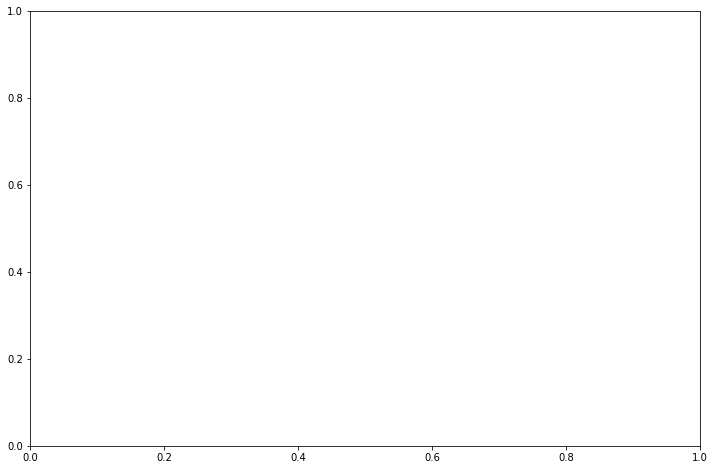

In [53]:
_=plt.figure(figsize=(12,8))
sns.distplot(data['Installs'], bins=10 )

In [ ]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data['Installs'])
plt.title("Number of 'Installs'")

In [ ]:
# let s look at the outliers: make a condition :select only the apps that have less than 2 000 000 (1x10exp8) downloads
data[data['Installs']>2000000].count()

In [54]:
# drop these 828 outliers from the data 2x10exp6
data.drop( data[ data['Installs']>2000000].index , inplace=True)

TypeError: '>' not supported between instances of 'str' and 'int'

In [55]:
data.shape
# new nb of entries is 10711

(9360, 13)

TypeError: cannot perform reduce with flexible type

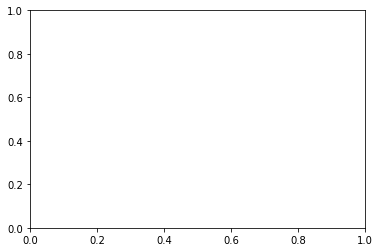

In [56]:
#vizualisation distribution of number of installs values wo the 130 outliers
_=sns.boxplot(data['Installs'])
plt.title("Number of 'Installs'")

# convert installs into categories: group1=installs between 1 and 4 million , group2 from 4 to 6, from 10 000 000

low = (data['Installs']<1000000)
medium = (data['Installs']>1000000)&(city_pop['Installs']<=4000000)
high = (data['Installs']>4000000)&(city_pop['population']<=8000000)


data.loc[data[small].index, 'Installs'] = 'low'
data.loc[data[medium].index, 'Installs'] = 'medium'
data.loc[data[high].index, 'Installs'] = 'high'


In [57]:
####Feature Size

In [58]:
#data['Size'].unique()

# to clean size we can use a for loop
## for loop to iterate over Size:

# create a new empty list:
my_new_size=[]

# create a list from series data['Size']
sizelist=data_merged['Size'].tolist()
                     
for size in sizelist:# size element in the list
       
        if size=='Varies with device':
            my_new_size.append(size)
            
        else:
            print(size)
            print(size[1:0])
            unit=size[-1]# the last character of the string is -1
            value=float(size[:-1])#change the value to float for all except last character

            if unit=='M':
                    new_value=value*1000000
                    my_new_size.append(new_value)
            elif unit=='k':
                    new_value=value/1000
                    my_new_size.append(new_value)

In [59]:
# another way

In [60]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'np.nan') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)

In [61]:
data['Size']=data['Size'].str.replace('+','')

In [62]:
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [63]:
size_array = data[data['Size']!=np.nan]['Size']

In [64]:
size_array

0            19
1            14
2           8.7
3            25
4           2.8
5           5.6
6            19
7            29
8            33
9           3.1
10           28
11           12
12           20
13           21
14           37
16          5.5
17           17
18           39
19           31
20           14
21           12
22          4.2
24           23
25          6.0
26           25
27          6.1
28          4.6
29          4.2
30          9.2
31          5.2
          ...  
10795       4.0
10796       7.8
10797        46
10799       6.8
10800        12
10801        19
10802        28
10803        81
10804        17
10805        15
10809        24
10810        21
10812        13
10814        31
10815       4.9
10817       8.0
10819       3.6
10820       8.6
10826    np.nan
10827        13
10828        13
10829       7.4
10830       2.3
10832     0.582
10833     0.619
10834       2.6
10836        53
10837       3.6
10839    np.nan
10840        19
Name: Size, Length: 9360

In [65]:
# replace nan by mean: create an array with the non null values and apply the mean

In [66]:
# new size uniques (numeric, and no nans: 
data['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 'np.nan', '9.4',
       '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35', '54',
       0.201, '3.6', '5.7', '8.6', '2.4', '27', '2.7', '2.5', '7.0', '16',
       '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2',
       '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '22', '6.4',
       '3.2', '8.2', '4.9', '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5',
       '4.0', '2.3', '2.1', '42', '9.1', '55', 0.023, '7.3', '6.5', '1.5',
       '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3',
       '40', '7.8', '8.8', '6.6', '5.1', '61', '66', 0.079, '8.4', '3.7',
       0.118, '44', 0.695, '1.6', '6.2', '53', '1.4', '3.0', '7.2', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '70', '9.3', '8.1',
       '36', '6.9', '7.4', '84', '97', '2.0', '1.9',

In [67]:
# new size describe without the nan (mean previously was # mean 34.68 and median 25)
data['Size'].describe()
# wo the nan , the mean is 34 and median 34

count       9360
unique       413
top       np.nan
freq        1637
Name: Size, dtype: object

In [68]:
##### Feature Price 

In [69]:
#Price is store as an object
#data_merged['Price'].dtypes

In [70]:
data_merged['Price'].unique()

NameError: name 'data_merged' is not defined

In [71]:
# remove dollar from Price and store it in Price2
data_merged['Price']= data_merged['Price'].str.replace("$","")

NameError: name 'data_merged' is not defined

In [72]:
data_merged['Price'].unique()

NameError: name 'data_merged' is not defined

In [73]:
data_merged['Price'].isna().sum()

NameError: name 'data_merged' is not defined

In [74]:
# in order to know how to replace the NaN
# we need to look at the distribution of the non nulls to decide how to deal
# with the nan, replace by zero or by the mean/median?

In [75]:
data_merged['Price'] = data_merged['Price'].astype(float)

NameError: name 'data_merged' is not defined

In [76]:
# visualise non nulls in a graph to decide 
#select those rows that have a null value in the column Size
isnull_condition = (data_merged['Price'].isna())

NameError: name 'data_merged' is not defined

In [77]:
non_null_rating = data_merged[~isnull_condition]['Price']
#vizualisation distribution of NON NULLs of Size values
_=sns.distplot(non_null_rating)
plt.title("Apps by price")
plt.grid(True)
plt.tight_layout()

NameError: name 'data_merged' is not defined

In [78]:
# most apps are free so , change nan to zero
####

In [79]:
# store it into Price
data_merged['Price']=data_merged['Price'].fillna(0)

NameError: name 'data_merged' is not defined

In [80]:
data_merged['Price'].isna().sum()

NameError: name 'data_merged' is not defined

In [81]:
data_merged['Price'].dtypes

NameError: name 'data_merged' is not defined

In [82]:
data_merged['Price'].describe()

NameError: name 'data_merged' is not defined

In [83]:
###### Feature reviews: means numbr of reviews per app

In [84]:
# Reviews
data_merged['Reviews'].unique()

NameError: name 'data_merged' is not defined

In [85]:
len(data_merged['Reviews'].unique())

NameError: name 'data_merged' is not defined

In [86]:
data_merged['Reviews'].dtypes

NameError: name 'data_merged' is not defined

In [87]:
data_merged['Reviews'].describe()

NameError: name 'data_merged' is not defined

In [88]:
print("range number of reviews: ", data_merged['Reviews'].min(),"-",data_merged['Reviews'].max())

NameError: name 'data_merged' is not defined

In [89]:
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviews'], bins=10 )

NameError: name 'data_merged' is not defined

<Figure size 864x576 with 0 Axes>

In [90]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data_merged['Reviews'])
plt.title("Number of reviews")

NameError: name 'data_merged' is not defined

In [91]:
# vizualise, once apply log to reviews

In [92]:
def transform_continuous_to_logarithmic_scale(series):
  # Transform to logarithmic scale
  return np.log(series)

In [93]:
data_merged['Reviewslog']=transform_continuous_to_logarithmic_scale(data_merged['Reviews'])

NameError: name 'data_merged' is not defined

In [94]:
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviewslog'], bins=10 )

NameError: name 'data_merged' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
#### Feature Rating: has 40 missing values

In [ ]:
# Feature Rating: already a float , range should be within 0 to 5
# already a float , range should be within 0 to 5

In [ ]:
print("range:", data_merged['Rating'].min(),"-",data_merged['Rating'].max())

In [ ]:
print(data_merged['Rating'].isna().sum(),"missing values out of", len(data_merged['Rating']))

In [ ]:
data_merged['Rating'].describe()

In [ ]:
#select those rows that have a null value in the column share
isnull_condition = (data_merged['Rating'].isnull())

In [ ]:
non_null_rating = data_merged[~isnull_condition]['Rating']
#vizualisation distribution 0 of share values
_=sns.distplot(non_null_rating)
plt.title("Apps average rating")
plt.grid(True)
plt.tight_layout()

In [ ]:
rating_array = data_merged[data_merged['Rating']!=np.nan]['Rating']

In [ ]:
# replace 40 nan with mean rating
data_merged['Rating'].replace(np.nan,rating_array.mean())

In [ ]:
data_merged['Rating']= data_merged['Rating'].replace(np.nan,rating_array.mean())

In [ ]:
data_merged['Rating'].unique()

In [ ]:
#vizualisation distribution of new ['Rating'] values
_=sns.boxplot(data_merged['Rating'])
plt.title("Apps by rating")

In [ ]:
#### Feature Last Updated

In [ ]:
data_merged['Last Updated'].unique()

In [ ]:
#### Feature current version: I will deal with this later#####################

In [ ]:
#
data_merged['Current Ver'].unique()

In [ ]:
#newcurrentver=newcurrentver.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [ ]:
#newcurrentver.replace(np.nan,'Varies with device')

In [26]:
# check the data content of each feature and assign a type based on your understanding
numerical = ['Rating','Reviews','Size','Installs','Price','Android Ver','Current Ver_clean']

#nominal = ['type','App' 'category', 'Genres','Content Rating', 'month', 'year', 'day', 'month_year','Category']
# Build the correlation grid of cardinal variables with seaborn (tip: check pairplot kind reg)
plot=sns.pairplot(data[numerical], kind="reg", diag_kind='kde')

# Show only the lower triangle of the matrix
for i, j in zip(*np.triu_indices_from(plot.axes, 1)):
    plot.axes[i, j].set_visible(False)

KeyError: "['Current Ver_clean'] not in index"

In [ ]:
# Calculate the Pearson Coefficient and find most correlated pairs
# build the correlation matrix with the calculation of the pearson coefficient (tip: check pandas .corr() method)
correlation_matrix = data[cardinal].corr(method='pearson')

In [ ]:
# visualize correlation matrix in a heatmap
_=plt.figure(figsize=(8,8))
_=sns.heatmap(correlation_matrix)
_=plt.title('Correlation Matrix (Pearson Coefficient) between cardinal variables')

In [ ]:
##### export clean data into csv

In [ ]:
# before saving new csv double check data types for all
data_clean.info()


In [ ]:
# export data_clean
# Export data to my chosen folder
#data.to_csv("/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv", index=False, encoding='utf-8')